In [1]:
import tensorflow as tf


graph = tf.Graph()


with graph.as_default():
    hello = tf.constant("Hello TensorFlow")
    with tf.compat.v1.Session() as sess:
        print(sess.run(hello))

In [8]:
import tensorflow as tf

x = 2
y = 3

z = tf.add(x, y, name="Add")

z_value = z.numpy()
print(z_value)

5


In [9]:
a = tf.multiply(8, 5)
b = tf.multiply(a, 1)

b_value = b.numpy()
print(b_value)

40


In [10]:
a = tf.multiply(8, 5)
b = tf.multiply(4, 3)

b_value = b.numpy()
print(b_value)

12


In [11]:
graph = tf.Graph()

with graph.as_default():
    val = tf.multiply(3, 3)

    with tf.compat.v1.Session() as session:
        print(session.run(val))

9


In [13]:
x = tf.Variable(13)
print(x)

y = tf.Variable(tf.random.normal(shape=[500, 111], stddev=0.35), name="weights")
y = y.numpy()
print(y)

weights = tf.Variable(22, name="weights_1")
W2 = tf.Variable(weights.read_value(), name="weights_2")
W2 = W2.numpy()
print(W2)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=13>
[[ 0.14107606  0.43629068  0.37619492 ...  0.1962083   0.15006424
   0.23534477]
 [ 0.1303095  -0.09229585  0.09278669 ...  0.0470362  -0.25075448
  -0.00960788]
 [ 0.36435005  0.35983106 -0.4004232  ...  0.20639211 -0.15153217
   0.22244626]
 ...
 [ 0.2629911  -0.09785084  0.17406967 ...  0.0602855  -0.31937712
   0.61378646]
 [-0.22790518  0.2446264  -0.41563493 ... -0.20926593 -0.09963737
  -0.04379675]
 [-0.76142555 -0.07344237  0.2681341  ... -0.02527711  0.3336119
  -0.28008288]]
22


In [14]:
graph = tf.Graph()


with graph.as_default():
    x = tf.compat.v1.Variable(1212)
    init = tf.compat.v1.global_variables_initializer()

    with tf.compat.v1.Session() as session:
        session.run(init)
        print(session.run(x))

1212


In [16]:
W3 = tf.compat.v1.get_variable(
    name="weights",
    shape=[500, 111],
    initializer=tf.compat.v1.random_normal_initializer(),
)

In [21]:
with tf.compat.v1.variable_scope("scope"):
    a = tf.compat.v1.get_variable("x", [2])

with tf.compat.v1.variable_scope("scope", reuse=True):
    b = tf.compat.v1.get_variable("x", [2])

print(a.name)
print(b.name)

scope/x:0
scope/x:0


In [28]:
x = tf.constant(13)
print(x)


Tensor("Const_5:0", shape=(), dtype=int32)


In [29]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder("float", [None, 2])
y = x + 3

with tf.compat.v1.Session() as sess:
    x_val = [
        [1, 2],
        [3, 4],
        [5, 6],
        [7, 8],
    ]
    result = sess.run(y, feed_dict={x: x_val})
    print(result)

[[ 4.  5.]
 [ 6.  7.]
 [ 8.  9.]
 [10. 11.]]


In [30]:
# TensorBoard

x = tf.constant(1, name="x")
y = tf.constant(1, name="y")
a = tf.constant(3, name="a")
b = tf.constant(3, name="b")

prod1 = tf.multiply(x, y, name="prod1")
prod2 = tf.multiply(a, b, name="prod2")

sum = tf.add(prod1, prod2, name="sum")

with tf.compat.v1.Session() as sess:
    writer = tf.compat.v1.summary.FileWriter(logdir="./graphs", graph=sess.graph)
    print(sess.run(sum))
    
    

10


In [31]:
%tensorboard --logdir=graphs --port=8001

UsageError: Line magic function `%tensorboard` not found.


# Handwritten digits classification using TensorFlow

11490434/11490434 [==============================] - 6s 1us/step
No of images in training set: (60000, 28, 28)
No of labels in training set: (60000,)
No of images in test set: (10000, 28, 28)
No of labels in test set: (10000,)


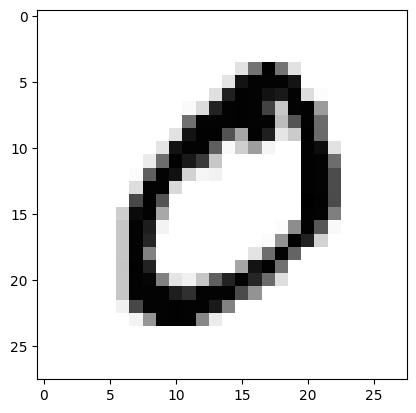

In [40]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt


# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Check the shape of the datasets
print("No of images in training set: {}".format(train_images.shape))
print("No of labels in training set: {}".format(train_labels.shape))
print("No of images in test set: {}".format(test_images.shape))
print("No of labels in test set: {}".format(test_labels.shape))
# Display the first training image

img1 = train_images[1].reshape(28,28)
plt.imshow(img1, cmap='Greys')
plt.show()





In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
tf.config.run_functions_eagerly(True)

# forward and backward propagation is automatically done in keras tensorflow. So it is not done manually. 
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Define the number of neurons in each layer
num_input = 784
num_hidden1 = 512
num_hidden2 = 256
num_hidden3 = 128
num_output = 10

# Build the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten the input images
model.add(layers.Dense(num_hidden1, activation='relu', kernel_initializer='truncated_normal'))
model.add(layers.Dense(num_hidden2, activation='relu', kernel_initializer='truncated_normal'))
model.add(layers.Dense(num_hidden3, activation='relu', kernel_initializer='truncated_normal'))
model.add(layers.Dense(num_output, activation='sigmoid'))  # Output layer with softmax

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Create a log directory for TensorBoard
log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

# Custom callback for logging test metrics
class CustomLoggingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
        
        # Log the test metrics
        tf.summary.scalar("Test Accuracy", test_accuracy, step=epoch)
        tf.summary.scalar("Test Loss", test_loss, step=epoch)

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels), steps_per_epoch=300)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_accuracy:.4f}')






Epoch 1/10
300/300 [==============================] - 21s 69ms/step - loss: 0.9804 - accuracy: 0.7535 - val_loss: 0.3879 - val_accuracy: 0.8974
Epoch 2/10
300/300 [==============================] - 18s 59ms/step - loss: 0.3623 - accuracy: 0.8993 - val_loss: 0.2815 - val_accuracy: 0.9195
Epoch 3/10
300/300 [==============================] - 20s 66ms/step - loss: 0.2753 - accuracy: 0.9205 - val_loss: 0.2419 - val_accuracy: 0.9307
Epoch 4/10
300/300 [==============================] - 18s 61ms/step - loss: 0.2432 - accuracy: 0.9292 - val_loss: 0.2233 - val_accuracy: 0.9337
Epoch 5/10
300/300 [==============================] - 17s 57ms/step - loss: 0.2109 - accuracy: 0.9396 - val_loss: 0.1905 - val_accuracy: 0.9445
Epoch 6/10
300/300 [==============================] - 16s 54ms/step - loss: 0.2048 - accuracy: 0.9418 - val_loss: 0.1720 - val_accuracy: 0.9504
Epoch 7/10
300/300 [==============================] - 17s 58ms/step - loss: 0.1754 - accuracy: 0.9496 - val_loss: 0.1826 - val_accuracy:

In [ ]:


#Eager Execution is directly implemented here in tensorflow 2.0

x = tf.constant(11)
y = tf.constant(11)
z = x*y
print(z)
z.numpy()

In [4]:
import tensorflow as tf


x = tf.constant([1.0, 2.0, 3.0])
y = tf.constant([3.0, 2.0, 1.0])


sum_result = tf.add(x, y)
print("\nSum:", sum_result.numpy())

difference = tf.subtract(x, y)
print("\nDifference:", difference.numpy())


product = tf.multiply(x, y)
print("\nProduct:", product.numpy())


division = tf.divide(x, y)
print("\nDivision:", division.numpy())


dot_product = tf.reduce_sum(tf.multiply(x, y))
print("\nDot Product:", dot_product.numpy())


x_min = tf.constant([10, 0, 13, 9])
print("\nIndex of minimum:", tf.argmin(x_min).numpy())
print("\nIndex of maximum:", tf.argmax(x_min).numpy())


x_var = tf.Variable([1, 3, 5, 7, 11])
y_var = tf.Variable([1])
squared_diff = tf.math.squared_difference(x_var, y_var)
print("\nSquared difference:", squared_diff.numpy())


print("\nOriginal dtype of x_var:", x_var.dtype)
x_var = tf.cast(x_var, dtype=tf.float32)
print("\nNew dtype of x_var:", x_var.dtype)


x_matrix = [[3, 6, 9], [7, 7, 7]]
y_matrix = [[4, 5, 6], [5, 5, 5]]
concat_rows = tf.concat([x_matrix, y_matrix], 0)


x = tf.constant([1.0, 2.0, 3.0])
y = tf.constant([3.0, 2.0, 1.0])


sum_result = tf.add(x, y)
print("\nSum:", sum_result.numpy())


difference = tf.subtract(x, y)
print("\nDifference:", difference.numpy())


product = tf.multiply(x, y)
print("\nProduct:", product.numpy())


division = tf.divide(x, y)
print("\nDivision:", division.numpy())


dot_product = tf.reduce_sum(tf.multiply(x, y))
print("\nDot Product:", dot_product.numpy())


x_min = tf.constant([10, 0, 13, 9])
print("\nIndex of minimum:", tf.argmin(x_min).numpy())
print("\nIndex of maximum:", tf.argmax(x_min).numpy())


x_var = tf.Variable([1, 3, 5, 7, 11])
y_var = tf.Variable([1])
squared_diff = tf.math.squared_difference(x_var, y_var)
print("\nSquared difference:", squared_diff.numpy())

print("\nOriginal dtype of x_var:", x_var.dtype)
x_var = tf.cast(x_var, dtype=tf.float32)
print("\nNew dtype of x_var:", x_var.dtype)


x_matrix = [[3, 6, 9], [7, 7, 7]]
y_matrix = [[4, 5, 6], [5, 5, 5]]
concat_rows = tf.concat([x_matrix, y_matrix], 0)
print("\nConcatenated Row-wise:\n", concat_rows.numpy())

concat_columns = tf.concat([x_matrix, y_matrix], 1)
print("\nConcatenated Column-wise:\n", concat_columns.numpy())


stacked = tf.stack(x_matrix, axis=1)
print("\nStacked:\n", stacked.numpy())


x_mean = tf.Variable([[1.0, 5.0], [2.0, 3.0]])
print("\nMean of x:", tf.reduce_mean(input_tensor=x_mean).numpy())
print("\nMean across rows:", tf.reduce_mean(input_tensor=x_mean, axis=0).numpy())
print(
    "\nMean across columns:",
    tf.reduce_mean(input_tensor=x_mean, axis=1, keepdims=True).numpy(),
)


random_normal = tf.random.normal(shape=(3, 2), mean=10.0, stddev=2.0)
print("\nRandom Normal:\n", random_normal.numpy())

random_uniform = tf.random.uniform(
    shape=(3, 2), minval=0, maxval=None, dtype=tf.float32
)
print("\nRandom Uniform:\n", random_uniform.numpy())


softmax_input = tf.constant([7.0, 2.0, 5.0])
softmax_result = tf.nn.softmax(softmax_input)
print("\nSoftmax probabilities:", softmax_result.numpy())


def square(x):
    return tf.multiply(x, x)


with tf.GradientTape(persistent=True) as tape:
    result = square(6.0)
    print("\nSquare of 6:", result.numpy())
("Concatenated Row-wise:\n", concat_rows.numpy())

concat_columns = tf.concat([x_matrix, y_matrix], 1)
print("\nConcatenated Column-wise:\n", concat_columns.numpy())


stacked = tf.stack(x_matrix, axis=1)
print("\nStacked:\n", stacked.numpy())


x_mean = tf.Variable([[1.0, 5.0], [2.0, 3.0]])
print("\nMean of x:", tf.reduce_mean(input_tensor=x_mean).numpy())
print("\nMean across rows:", tf.reduce_mean(input_tensor=x_mean, axis=0).numpy())
print(
    "Mean across columns:",
    tf.reduce_mean(input_tensor=x_mean, axis=1, keepdims=True).numpy(),
)


random_normal = tf.random.normal(shape=(3, 2), mean=10.0, stddev=2.0)
print("\nRandom Normal:\n", random_normal.numpy())

random_uniform = tf.random.uniform(
    shape=(3, 2), minval=0, maxval=None, dtype=tf.float32
)
print("\nRandom Uniform:\n", random_uniform.numpy())


softmax_input = tf.constant([7.0, 2.0, 5.0])
softmax_result = tf.nn.softmax(softmax_input)
print("\nSoftmax probabilities:", softmax_result.numpy())


def square(x):
    return tf.multiply(x, x)


with tf.GradientTape(persistent=True) as tape:
    result = square(6.0)
    print("\nSquare of 6:", result.numpy())4=-==


Sum: [4. 4. 4.]

Difference: [-2.  0.  2.]

Product: [3. 4. 3.]

Division: [0.33333334 1.         3.        ]

Dot Product: 10.0

Index of minimum: 1

Index of maximum: 2

Squared difference: [  0   4  16  36 100]

Original dtype of x_var: <dtype: 'int32'>

New dtype of x_var: <dtype: 'float32'>

Sum: [4. 4. 4.]

Difference: [-2.  0.  2.]

Product: [3. 4. 3.]

Division: [0.33333334 1.         3.        ]

Dot Product: 10.0

Index of minimum: 1

Index of maximum: 2

Squared difference: [  0   4  16  36 100]

Original dtype of x_var: <dtype: 'int32'>

New dtype of x_var: <dtype: 'float32'>

Concatenated Row-wise:
 [[3 6 9]
 [7 7 7]
 [4 5 6]
 [5 5 5]]

Concatenated Column-wise:
 [[3 6 9 4 5 6]
 [7 7 7 5 5 5]]

Stacked:
 [[3 7]
 [6 7]
 [9 7]]

Mean of x: 2.75

Mean across rows: [1.5 4. ]

Mean across columns: [[3. ]
 [2.5]]

Random Normal:
 [[ 7.562291 11.78431 ]
 [10.549743  8.480796]
 [ 8.059488 11.451664]]

Random Uniform:
 [[0.49796402 0.641899  ]
 [0.38124442 0.8763828 ]
 [0.673524  